In [15]:
import numpy as np
import rasterio as rastr
from rasterio.plot import show

In [4]:
import rasterio
import numpy as np

# відкриваємо зображення
with rasterio.open("../images/soil_moisture.tif") as src:
    # отримуємо масив значень вологості
    humidity_array = src.read(1)
    
    # визначаємо середнє значення вологості
    mean_humidity = np.mean(humidity_array)

print("Середнє значення вологості: ", mean_humidity)



Середнє значення вологості:  38598.998165067474


In [20]:
import numpy as np
import rasterio

with rasterio.open("../images/soil_moisture.tif") as src:
    array = src.read(1)
    mask = (array == -9999) # assuming -9999 represents error values
    array[mask] = 0
    
    # copy metadata from the source raster
    profile = src.profile
    dtype = np.dtype('uint16') # set datatype to uint16
    profile.update(dtype=dtype, nodata=0) # set nodata value to 0
    
    # write new raster to disk
    with rasterio.open('output_raster.tif', 'w', **profile) as dst:
        dst.write(array.astype(dtype), 1)


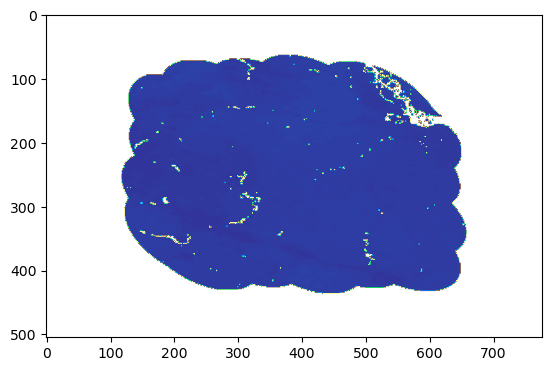

<AxesSubplot:>

In [26]:
import rasterio as rastr
from rasterio.plot import show

# Load the new image file
with rasterio.open("../images/output_raster.tif") as src:
    output_raster = src.read(1)

# Display the image
show(output_raster, cmap='terrain')
